In [1]:
import pandas as pd
import numpy as np

### Importing the data

In [2]:
df=pd.read_csv('/Users/rishavmishra/Desktop/ML 2 Assignment 1/DataCoSupplyChainDataset.csv',header= 0,encoding= 'unicode_escape')
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


## Performing Data transformation for our analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

### Concatenating first name and last name columns

In [4]:
df['cust_name']=df['Customer Fname'].astype(str)+df['Customer Lname'].astype(str)

### Now dropping the irrelevant columns which are unimportant for this analysis.

In [5]:
df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname',
         'Customer Lname','Latitude','Longitude','Product Description','Product Image','Order Zipcode',
         'shipping date (DateOrders)'],axis=1, inplace = True)

In [6]:
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,cust_name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,Standard Class,OrliHendricks


In [7]:
df.isnull().sum().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id               

### Replacing the null values in the 'Customer Zipcode' column with 0

In [8]:
df['Customer Zipcode']=df['Customer Zipcode'].fillna(0)

### creating new columns for months, year and date and dropping the date column.

In [9]:
df['order_yr']= pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).weekday
df['order_hour'] = pd.DatetimeIndex(df['order date (DateOrders)']).hour

# Data Visualization

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### We will find the order which is costing money for the company, i.e, company is siffering loss. so the condition will be ['Benefit per order']<0

In [11]:
loss = df[(df['Benefit per order']<0)]

### Now plotting the bar graph for the top 10 product category which has suffered the most loss.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'LATAM'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Pacific Asia'),
  Text(3, 0, 'USCA'),
  Text(4, 0, 'Africa')])

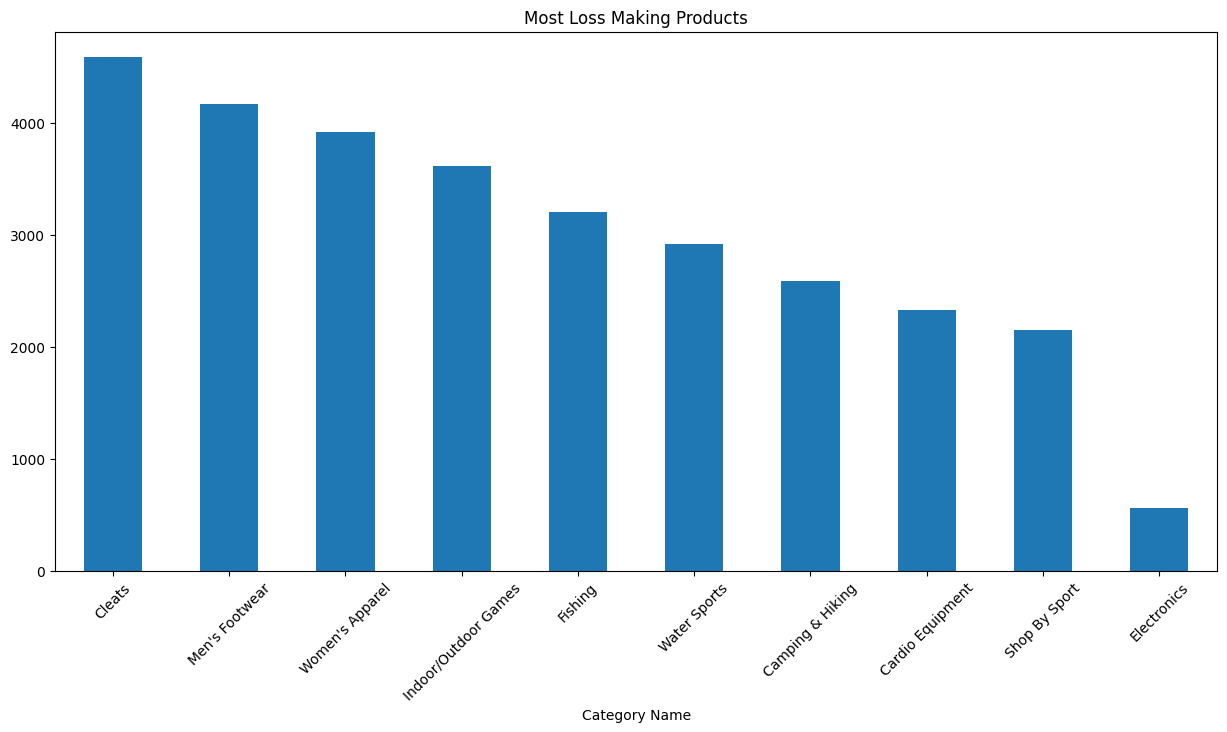

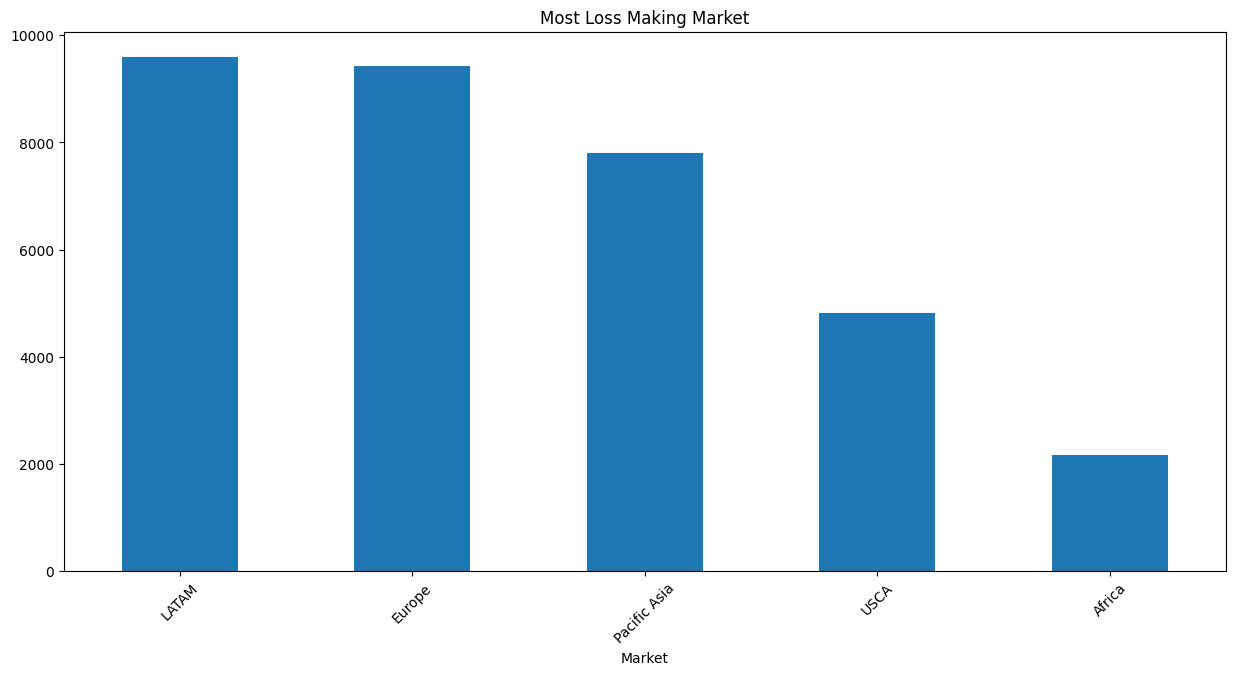

In [12]:
plt.figure(1)
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(15,7), title="Most Loss Making Products")
plt.xticks(rotation = 45)
plt.figure(2)
loss['Market'].value_counts().nlargest(10).plot.bar(figsize=(15,7), title="Most Loss Making Market")
plt.xticks(rotation = 45)

### As we can see below that only Transfer payments have a possible suspected fraud situation.

In [13]:
status = df.groupby('Type')['Order Status'].value_counts()
status_df = status.to_frame()
status_df

count
Type     Order Status          
CASH     CLOSED           19616
DEBIT    COMPLETE         59491
         ON_HOLD           9804
PAYMENT  PENDING_PAYMENT  39832
         PAYMENT_REVIEW    1893
TRANSFER PROCESSING       21902
         PENDING          20227
         SUSPECTED_FRAUD   4062
         CANCELED          3692

In [14]:
train_df = df.copy()

### Now creating 2 columns as fraud which will show if the the order is suspected fraud and Late delivery which will show if the devilvery is late or not.

In [15]:
train_df['fraud'] = np.where(train_df['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_df['late_delivery']=np.where(train_df['Delivery Status'] == 'Late delivery', 1, 0)

In [16]:
train_df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'Shipping Mode', 'cust_name', 'order_yr',
       'order_month', 'order_day', 'order_hour', 'fraud', 'late_delivery'],
      dtyp

### Removing the Identical columns.

In [17]:
train_df.drop(['Delivery Status','Late_delivery_risk','Order Status','order date (DateOrders)'], axis=1, inplace=True)

In [18]:
train_df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Segment                  object
Customer State                    object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Produ

# Now encoding the all column of object type

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

In [21]:
train_df['Type']=le.fit_transform(train_df['Type'])
train_df['Category Name']=le.fit_transform(train_df['Category Name'])
train_df['Customer City']=le.fit_transform(train_df['Customer City'])
train_df['Customer Country']=le.fit_transform(train_df['Customer Country'])
train_df['Customer Segment']=le.fit_transform(train_df['Customer Segment'])
train_df['Customer State']=le.fit_transform(train_df['Customer State'])
train_df['Department Name']=le.fit_transform(train_df['Department Name'])
train_df['Market']=le.fit_transform(train_df['Market'])
train_df['Order City']=le.fit_transform(train_df['Order City'])
train_df['Order Country']=le.fit_transform(train_df['Order Country'])
train_df['Order Region']=le.fit_transform(train_df['Order Region'])
train_df['Order State']=le.fit_transform(train_df['Order State'])
train_df['Product Name']=le.fit_transform(train_df['Product Name'])
train_df['Shipping Mode']=le.fit_transform(train_df['Shipping Mode'])
train_df['cust_name']=le.fit_transform(train_df['cust_name'])

In [22]:
train_df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Name,Product Price,Shipping Mode,cust_name,order_yr,order_month,order_day,order_hour,fraud,late_delivery
0,1,3,4,91.250000,314.640015,73,40,66,1,20755,...,78,327.750000,3,1876,2018,1,2,22,0,0
1,3,5,4,-249.089996,311.359985,73,40,66,1,19492,...,78,327.750000,3,5378,2018,1,5,12,0,1
2,0,4,4,-247.779999,309.720001,73,40,452,0,19491,...,78,327.750000,3,4429,2018,1,5,12,0,0
3,1,3,4,22.860001,304.809998,73,40,285,0,19490,...,78,327.750000,3,12929,2018,1,5,11,0,0
4,2,2,4,134.210007,298.250000,73,40,66,1,19489,...,78,327.750000,3,10638,2018,1,5,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,399.980011,45,18,59,0,1005,...,24,399.980011,3,8426,2016,1,5,3,0,0
180515,1,3,2,-613.770019,395.980011,45,18,26,0,9141,...,24,399.980011,2,11679,2016,1,5,1,0,1
180516,3,5,4,141.110001,391.980011,45,18,55,0,291,...,24,399.980011,3,6300,2016,1,4,21,0,1
180517,2,3,4,186.229996,387.980011,45,18,66,1,2813,...,24,399.980011,3,9384,2016,1,4,20,0,0


###    Creating our input data and output data 

In [23]:
X1=train_df.drop(['fraud'],axis=1)

In [24]:
X1

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Category Id,Product Name,Product Price,Shipping Mode,cust_name,order_yr,order_month,order_day,order_hour,late_delivery
0,1,3,4,91.250000,314.640015,73,40,66,1,20755,...,73,78,327.750000,3,1876,2018,1,2,22,0
1,3,5,4,-249.089996,311.359985,73,40,66,1,19492,...,73,78,327.750000,3,5378,2018,1,5,12,1
2,0,4,4,-247.779999,309.720001,73,40,452,0,19491,...,73,78,327.750000,3,4429,2018,1,5,12,0
3,1,3,4,22.860001,304.809998,73,40,285,0,19490,...,73,78,327.750000,3,12929,2018,1,5,11,0
4,2,2,4,134.210007,298.250000,73,40,66,1,19489,...,73,78,327.750000,3,10638,2018,1,5,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,399.980011,45,18,59,0,1005,...,45,24,399.980011,3,8426,2016,1,5,3,0
180515,1,3,2,-613.770019,395.980011,45,18,26,0,9141,...,45,24,399.980011,2,11679,2016,1,5,1,1
180516,3,5,4,141.110001,391.980011,45,18,55,0,291,...,45,24,399.980011,3,6300,2016,1,4,21,1
180517,2,3,4,186.229996,387.980011,45,18,66,1,2813,...,45,24,399.980011,3,9384,2016,1,4,20,0


In [25]:
y=train_df['fraud']
y

0         0
1         0
2         0
3         0
4         0
         ..
180514    0
180515    0
180516    0
180517    0
180518    0
Name: fraud, Length: 180519, dtype: int64

### Now we will standardise our data

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X1)
X

array([[-0.6787717 , -0.30649053,  0.77715232, ..., -0.503426  ,
         1.51904261, -1.10173327],
       [ 1.33199653,  0.92525096,  0.77715232, ...,  0.99542705,
         0.07457927,  0.90766071],
       [-1.68415582,  0.30938021,  0.77715232, ...,  0.99542705,
         0.07457927, -1.10173327],
       ...,
       [ 1.33199653,  0.92525096,  0.77715232, ...,  0.49580937,
         1.37459628,  0.90766071],
       [ 0.32661241, -0.30649053,  0.77715232, ...,  0.49580937,
         1.23014995, -1.10173327],
       [ 0.32661241,  0.30938021,  0.77715232, ...,  0.49580937,
         0.94125728, -1.10173327]])

### Now splitting our data in training and testing test set

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.4,random_state=42)

### Now importing the neural network classifier

In [29]:
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(hidden_layer_sizes=(3), activation='logistic', solver='lbfgs',random_state=1)

### Fitting the data in the model

In [30]:
nn.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=3, random_state=1,
              solver='lbfgs')

### Finding the weights of the neural network

In [31]:
nn.coefs_

[array([[-4.63433750e+00, -4.35688901e+00, -5.59281456e+00],
        [-4.30653047e-01, -3.54344686e-01, -2.27943183e-01],
        [-1.63267827e-01,  1.05892615e-01,  9.01601336e-01],
        [-4.39069451e-02, -5.73084731e-02, -3.49441734e-01],
        [-3.85334250e-01,  2.40463758e-02, -4.42395281e-01],
        [-1.86940560e-01,  1.00703616e-01,  1.26096782e-01],
        [ 2.00226176e-02,  4.34130409e-03,  3.63948290e-01],
        [ 1.37540794e-01, -2.04629315e-02, -5.60153194e-02],
        [ 3.08606069e-01, -2.55157836e-02, -6.47669874e-02],
        [-2.96157898e-01,  7.22311692e-03,  2.98008727e-03],
        [ 3.23484955e-01,  1.23762217e-02,  2.08075423e-01],
        [ 6.20982143e-02, -1.63207000e-02,  2.56179870e-01],
        [-1.07832072e-01, -1.03643364e-02, -7.53742375e-01],
        [-2.30402137e-01, -1.20068369e-02,  2.37050230e-01],
        [-4.14943476e-01, -1.67149094e-03, -3.27679430e-02],
        [-4.45901040e-01,  1.54859103e-02,  2.56940680e-01],
        [ 4.33323101e-01

### checking the accuracy of the training data

In [32]:
nn.score(X_train,y_train)

0.9785986649555447

# Now calculating the confusion matrix for the training data

In [33]:
y_predict_train=nn.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
from sklearn.metrics import confusion_matrix
cm_train=confusion_matrix(y_train,y_predict_train)
cm_train

array([[105495,    402],
       [  1916,    498]])

# Now calculating the confusion matrix for the test data

In [35]:
nn.score(X_test,y_test)

0.9785342344338578

In [36]:
y_predict_test=nn.predict(X_test)
y_predict_test

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
cm_test=confusion_matrix(y_test,y_predict_test)
cm_test

array([[70310,   250],
       [ 1300,   348]])

In [38]:
!